In [2]:
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
# Loading CSVs to variables
State_df = pd.read_csv("data/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
rental_df = pd.read_csv('data/Metro_zori_uc_sfrcondomfr_sm_month.csv')


# Zillow Home Values Index (ZHVI)

In [4]:
del State_df['StateName']
State_df = State_df.loc[State_df["RegionName"].isin(["Texas", "California", "Florida", "Pennsylvania", "New York"])]
column_start = 4
columm_end = 220
State_df.drop(State_df.columns[column_start:columm_end], axis= 1, inplace= True)
State_df

,RegionID,SizeRank,RegionName,RegionType,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,9,0,California,state,491858.110459,497298.408138,502257.614153,506336.687832,510068.671902,513106.423962,...,700645.417980,700071.790442,702993.413576,708109.782990,715006.691673,722810.830530,730268.503111,736332.486797,740671.921245,743434.729197
1,54,1,Texas,state,190853.792103,191839.197281,192993.433201,194073.381008,195199.660072,196055.002434,...,293015.813177,292651.823251,292966.319007,293782.318512,294517.200523,295087.477528,295124.789296,294898.327140,294417.715350,293824.060476
2,14,2,Florida,state,219544.257012,220771.032095,222005.073060,223228.058910,224496.444069,225564.899728,...,378905.178430,379344.093513,380382.617962,382034.246422,383713.911859,385378.442796,386536.027985,387584.884146,388504.505535,389325.245410
3,43,3,New York,state,312968.619343,314079.786906,315527.420718,317146.005162,319500.961683,321626.169376,...,430860.488993,432344.784056,434774.062081,437629.211834,440656.724847,443733.624198,446344.733234,448195.711473,449741.470945,451434.182956
4,47,4,Pennsylvania,state,171604.239805,172309.541572,173286.086102,174213.676170,174950.437899,175314.388299,...,243504.365704,244306.951388,245814.703016,247602.348582,249341.677802,251008.430940,252308.868444,253189.352626,253718.399927,254151.927536


In [5]:
# Define the range for the year 2018
start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2018-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2018 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2018['avg_of_2018'] = df_2018.iloc[:, 5:].mean(axis=1)

# Display the new DataFrame
df_2018.head()


/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/1942119663.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['avg_of_2018'] = df_2018.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,avg_of_2018
0,9,0,California,state,491858.110459,497298.408138,502257.614153,506336.687832,510068.671902,513106.423962,515870.080781,518835.021568,522180.277654,525738.610147,528254.914476,529729.276849,515425.089769
1,54,1,Texas,state,190853.792103,191839.197281,192993.433201,194073.381008,195199.660072,196055.002434,197032.709651,197912.266041,198780.164089,199442.085189,200192.681442,201027.283668,196777.078552
2,14,2,Florida,state,219544.257012,220771.032095,222005.073060,223228.058910,224496.444069,225564.899728,226949.968406,228303.027785,229677.014116,230807.730189,232008.423950,233306.053321,227010.702330
3,43,3,New York,state,312968.619343,314079.786906,315527.420718,317146.005162,319500.961683,321626.169376,324025.831503,326366.050942,328766.789250,330356.989045,331488.138495,332151.744132,323730.535201
4,47,4,Pennsylvania,state,171604.239805,172309.541572,173286.086102,174213.676170,174950.437899,175314.388299,175694.496841,176131.837070,176549.942568,176792.343966,177065.316734,177432.844449,175430.991970


In [6]:
# Define the range for the year 2018
start_date = pd.Timestamp('2019-01-01')
end_date = pd.Timestamp('2019-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2019 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2019['avg_of_2019'] = df_2019.iloc[:, 5:].mean(axis=1)
df_2019 = df_2019.drop(columns=['2018-01-31'])

# Display the new DataFrame
df_2019.head()

/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/235202503.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['avg_of_2019'] = df_2019.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,avg_of_2019
0,9,0,California,state,529269.453898,527688.349373,525896.963179,524868.799232,524253.284627,523873.718904,524272.587796,525940.770359,528490.649482,531496.409517,534769.076697,538160.815983,528248.406587
1,54,1,Texas,state,201854.180841,202582.923558,203213.396119,203745.859096,204224.317236,204688.474443,205180.946699,205771.231717,206416.249335,207279.728075,208302.120151,209415.366267,205222.899461
2,14,2,Florida,state,234477.080146,235527.863375,236238.415411,236751.478091,237027.235426,237426.750806,237943.330054,238647.836163,239348.200965,240276.309274,241545.746372,243110.222492,238193.372381
3,43,3,New York,state,333230.947083,334751.076892,336399.041354,337785.463881,338577.522435,339544.146363,340529.672176,341708.745657,342353.299447,343080.065334,344531.525482,346377.652780,339905.763240
4,47,4,Pennsylvania,state,178086.398138,179069.381630,180103.354414,180938.588165,181487.221816,182085.924698,182760.985293,183469.567550,184112.675459,184923.059392,185954.632191,187073.384918,182505.431139


In [7]:
# Define the range for the year 2018
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2020-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2020 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2020['avg_of_2020'] = df_2020.iloc[:, 5:].mean(axis=1)
df_2020 = df_2020.drop(columns=['2018-01-31'])

# Display the new DataFrame
df_2020.head()

/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/2255554903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['avg_of_2020'] = df_2020.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,avg_of_2020
0,9,0,California,state,540931.038781,543158.855883,545305.253020,547287.216491,547537.538170,546351.665440,546198.634115,549387.763920,556467.752249,565558.946924,576145.165648,586704.546377,554252.864751
1,54,1,Texas,state,210545.582495,211638.999798,212705.369421,213474.117542,213748.616194,213912.914543,214555.172769,215950.344328,218056.464570,220433.454817,223144.332192,225770.796041,216161.347059
2,14,2,Florida,state,245005.648238,246791.388282,248360.301305,249314.605789,249577.786898,249709.754253,250273.431863,251827.231589,254319.298784,257268.206577,260730.533128,264171.787453,252279.164513
3,43,3,New York,state,348653.362895,350388.301955,351985.150345,353311.483545,354465.427044,355089.240048,355265.919364,355671.025630,357712.984011,361059.963460,365483.226010,370362.289388,356620.697808
4,47,4,Pennsylvania,state,188177.979966,189335.672529,190578.034339,191940.389762,192766.839831,193108.533447,193405.776355,194400.403946,196516.480824,199174.477927,202354.762129,205348.506722,194758.988148


In [8]:
# Define the range for the year 2018
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2021-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2021 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2021['avg_of_2021'] = df_2021.iloc[:, 5:].mean(axis=1)
df_2021 = df_2021.drop(columns=['2018-01-31'])

# Display the new DataFrame
df_2021.head()

/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/2410200545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['avg_of_2021'] = df_2021.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,avg_of_2021
0,9,0,California,state,595472.905191,602974.984537,609771.248009,618668.459927,629322.330587,640761.047114,651099.604018,658252.388197,663102.605818,667432.611561,673141.815744,680179.971635,640848.331028
1,54,1,Texas,state,228528.067109,231465.036340,234790.309331,238480.590459,242703.743516,247222.262378,251367.598494,254527.519024,256837.496430,259233.690529,262336.104798,265902.238191,247782.888050
2,14,2,Florida,state,267733.428752,271281.822152,275073.570762,279290.197234,284392.986473,290640.102805,297037.448404,302728.794316,307340.396460,311880.923878,316960.286639,322450.789753,293900.895636
3,43,3,New York,state,374980.903902,379800.507748,384303.885414,388488.062048,392670.977783,396588.639532,400049.833618,402159.956813,403203.127304,404710.154635,406975.816971,409653.899257,395298.813752
4,47,4,Pennsylvania,state,208104.814896,210795.333392,213595.928716,216468.043942,219352.757669,222377.051608,224570.922613,225423.050862,224683.693536,224093.857832,224199.129616,225146.167348,219900.896003


In [9]:
# Define the range for the year 2018
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2022-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2022 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2022['avg_of_2022'] = df_2022.iloc[:, 5:].mean(axis=1)
df_2022 = df_2022.drop(columns=['2018-01-31'])

# Display the new DataFrame
df_2022.head()

/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/2967206592.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['avg_of_2022'] = df_2022.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,avg_of_2022
0,9,0,California,state,689995.470234,702590.917574,717779.001909,731590.718233,742001.741856,747537.106457,747839.620505,743276.238749,735977.776045,729407.375607,724243.959697,719817.986763,727671.492802
1,54,1,Texas,state,270593.989962,275841.380936,281774.934997,287531.824796,292823.334670,297441.913282,300250.228108,301131.830786,300481.904137,299552.628324,298572.392525,297312.852479,291942.434584
2,14,2,Florida,state,329343.273479,337360.096574,346822.520514,356773.139109,366309.725639,374786.575937,380538.214837,383449.477636,383821.737458,383346.066686,382649.602295,381815.749172,367251.348278
3,43,3,New York,state,412808.664189,416633.277660,421737.775529,426960.634439,431727.598222,436288.728549,439365.213077,440286.768964,438726.389633,436906.635097,435358.784658,433784.129125,430882.049928
4,47,4,Pennsylvania,state,227439.075988,230802.761413,235011.657640,238826.469981,241773.532316,244074.644195,244959.631915,244753.004261,243808.554058,243514.643431,243710.504767,243915.585371,240215.838778


In [10]:
# Define the range for the year 2018
start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-12-31')

# Filter columns within the range of the year 2018
filtered_columns = list(State_df.columns[:5]) + [column for column in State_df.columns[5:] if start_date <= pd.to_datetime(column, errors='coerce') <= end_date]

# Create a new DataFrame using the filtered columns
df_2023 = State_df[filtered_columns]

# Calculate the average for the year 2018
df_2023['avg_of_2023'] = df_2023.iloc[:, 5:].mean(axis=1)
df_2023 = df_2023.drop(columns=['2018-01-31'])

# Display the new DataFrame
df_2023.head()

/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/4282046370.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['avg_of_2023'] = df_2023.iloc[:, 5:].mean(axis=1)


,RegionID,SizeRank,RegionName,RegionType,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,avg_of_2023
0,9,0,California,state,712932.110302,705852.879670,700645.417980,700071.790442,702993.413576,708109.782990,715006.691673,722810.830530,730268.503111,736332.486797,740671.921245,743434.729197,718260.879793
1,54,1,Texas,state,295650.970670,294070.609803,293015.813177,292651.823251,292966.319007,293782.318512,294517.200523,295087.477528,295124.789296,294898.327140,294417.715350,293824.060476,294167.285394
2,14,2,Florida,state,380487.436418,379362.655779,378905.178430,379344.093513,380382.617962,382034.246422,383713.911859,385378.442796,386536.027985,387584.884146,388504.505535,389325.245410,383463.270521
3,43,3,New York,state,432136.026822,430766.787973,430860.488993,432344.784056,434774.062081,437629.211834,440656.724847,443733.624198,446344.733234,448195.711473,449741.470945,451434.182956,439884.817451
4,47,4,Pennsylvania,state,243736.637881,243352.413158,243504.365704,244306.951388,245814.703016,247602.348582,249341.677802,251008.430940,252308.868444,253189.352626,253718.399927,254151.927536,248503.006417


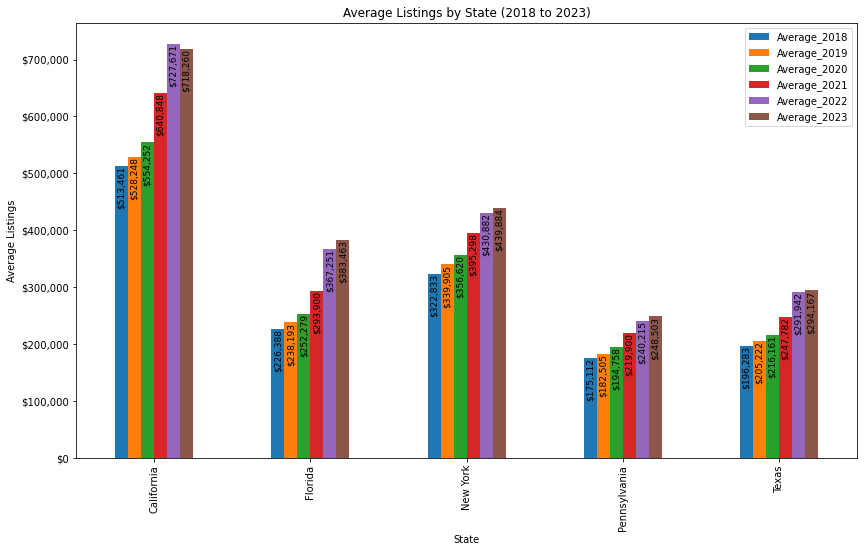

In [11]:
from matplotlib.ticker import FuncFormatter
selected_columns = ['RegionName'] + [col for col in State_df.columns if any(str(year) in col for year in range(2018, 2024))]
selected_data = State_df[selected_columns]
# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['RegionName'].isin(['California', 'Florida', 'New York', 'Pennsylvania', 'Texas'])]
# Create a new column for each year and calculate the average values
for year in range(2018, 2024):
    selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.filter(like=str(year)).mean(axis=1)
# Group by state and select the average for each year
grouped_df = selected_data_ny_tx.groupby('RegionName')[[f'Average_{year}' for year in range(2018, 2024)]].mean()
# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average Listings')
ax.set_xlabel('State')
ax.set_title('Average Listings by State (2018 to 2023)')
# Annotate each bar with its exact value vertically
for p in ax.patches:
    ax.annotate(f'${int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',
                xytext=(0, 0),
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')
# Format y-axis labels to display in thousands
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))  # Adding '$' before the formatted number
 # Adjust the font size here

# Show the plot
plt.show()


515425.089769    1
196777.078552    1
227010.702330    1
323730.535201    1
175430.991970    1
Name: avg_of_2018, dtype: int64

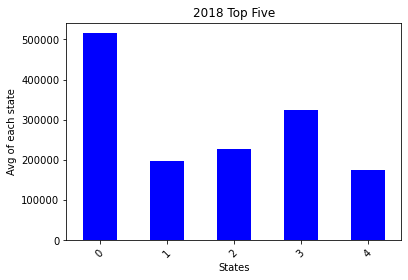

In [12]:
df_2018['avg_of_2018']

clean_data_chart_1 = df_2018['avg_of_2018']

clean_data_chart_1
plot_panda = clean_data_chart_1.plot.bar(color='b')

plt.title("2018 Top Five")
plt.ylabel("Avg of each state")
plt.xlabel("States")
plt.savefig('output/plot2.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
df_2018['avg_of_2018'].value_counts()

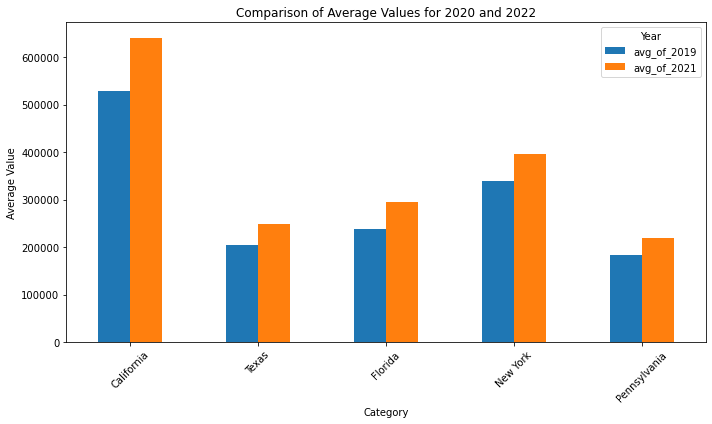

In [13]:
merged_df = pd.merge(df_2019, df_2021, on='RegionName', suffixes=('avg_of_2019','avg_of_2021'))

# Plotting the bar chart
merged_df.plot(x='RegionName', y=['avg_of_2019', 'avg_of_2021'], kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Comparison of Average Values for 2020 and 2022')

# Display the plot
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1008x576 with 0 Axes>

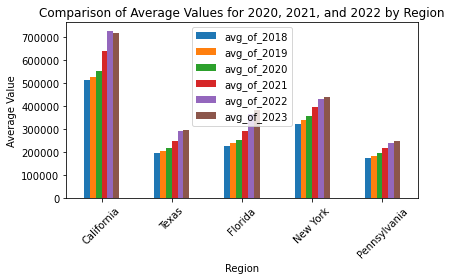

In [14]:
# Extract the last column from each DataFrame
last_column_2018 = df_2018.iloc[:, -1]
last_column_2019 = df_2019.iloc[:, -1]
last_column_2020 = df_2020.iloc[:, -1]
last_column_2021 = df_2021.iloc[:, -1]
last_column_2022 = df_2022.iloc[:, -1]
last_column_2023 = df_2023.iloc[:, -1]

# Extract the 'RegionName' column from one of the DataFrames (assuming it's the same for all)
region_column = df_2020['RegionName']

# Concatenate the last columns and the 'RegionName' column horizontally
df_concat = pd.concat([region_column,last_column_2018,last_column_2019, last_column_2020, last_column_2021, last_column_2022,last_column_2023], axis=1)
df_concat.columns = ['RegionName','avg_of_2018','avg_of_2019','avg_of_2020', 'avg_of_2021', 'avg_of_2022', 'avg_of_2023']

# Plotting the bar chart

plt.figure(figsize=(14, 8))
df_concat.set_index('RegionName').plot(kind='bar')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.title('Comparison of Average Values for 2020, 2021, and 2022 by Region')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

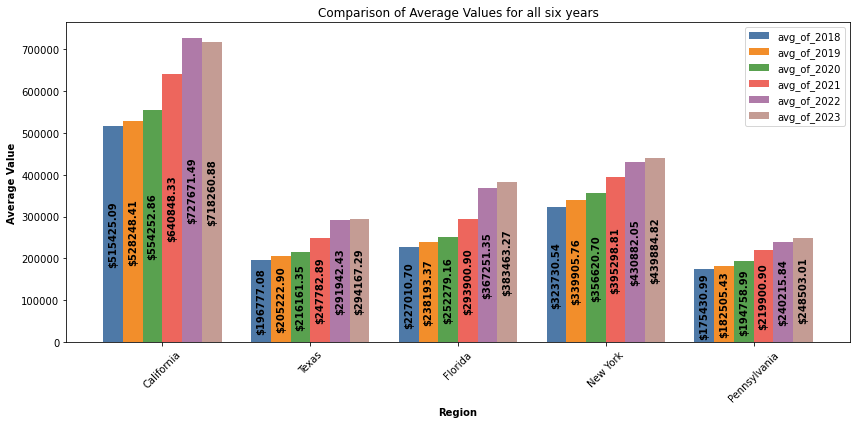

In [15]:
# Define a color palette
modern_colors = ['#4e79a7', '#f28e2b', '#59a14f', '#ed665d', '#af7aa8', '#c49c94']

plt.figure(figsize=(12, 6))
ax = df_concat.set_index('RegionName').plot(kind='bar', width=0.8, color=modern_colors, figsize=(12,6))  # Use the color palette here

# Add numbers inside the bars with smaller font size
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', label_type='center', rotation='vertical', size=10, fontweight='bold')

# Set labels and title
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.title('Comparison of Average Values for all six years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
conditions = ['2000-','2001-','2002-','2003-','2004-','2005-','2006-','2007-','2008-','2009-','2010-','2011-','2012-','2013-',
              '2014-','2015-','2016-','2017-','RegionID','SizeRank','RegionType', 'StateName']
to_drop = State_df.columns[State_df.columns.str.contains('|'.join(conditions))]
ZHVI = State_df.loc[State_df["RegionName"].isin(["Texas", "California", "Florida", "Pennsylvania", "New York"])]
ZHVI = ZHVI.drop(columns=to_drop)
ZHVI

,RegionName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,California,491858.110459,497298.408138,502257.614153,506336.687832,510068.671902,513106.423962,515870.080781,518835.021568,522180.277654,...,700645.417980,700071.790442,702993.413576,708109.782990,715006.691673,722810.830530,730268.503111,736332.486797,740671.921245,743434.729197
1,Texas,190853.792103,191839.197281,192993.433201,194073.381008,195199.660072,196055.002434,197032.709651,197912.266041,198780.164089,...,293015.813177,292651.823251,292966.319007,293782.318512,294517.200523,295087.477528,295124.789296,294898.327140,294417.715350,293824.060476
2,Florida,219544.257012,220771.032095,222005.073060,223228.058910,224496.444069,225564.899728,226949.968406,228303.027785,229677.014116,...,378905.178430,379344.093513,380382.617962,382034.246422,383713.911859,385378.442796,386536.027985,387584.884146,388504.505535,389325.245410
3,New York,312968.619343,314079.786906,315527.420718,317146.005162,319500.961683,321626.169376,324025.831503,326366.050942,328766.789250,...,430860.488993,432344.784056,434774.062081,437629.211834,440656.724847,443733.624198,446344.733234,448195.711473,449741.470945,451434.182956
4,Pennsylvania,171604.239805,172309.541572,173286.086102,174213.676170,174950.437899,175314.388299,175694.496841,176131.837070,176549.942568,...,243504.365704,244306.951388,245814.703016,247602.348582,249341.677802,251008.430940,252308.868444,253189.352626,253718.399927,254151.927536


In [17]:
states_app = ['CA','TX','FL','NY','PA']
ZHVI['RegionName'] = states_app
ZHVI_reindexed = ZHVI.set_index(ZHVI['RegionName']).drop(columns=['RegionName'])
ZHVI_transposed = ZHVI_reindexed.T
ZHVI_transposed = ZHVI_transposed.reset_index()
ZHVI_transposed.rename(columns = {'index':'Date'}, inplace=True)
ZHVI_transposed.columns.names = ['']
ZHVI_database = ZHVI_transposed
ZHVI_database

,Date,CA,TX,FL,NY,PA
0,2018-01-31,491858.110459,190853.792103,219544.257012,312968.619343,171604.239805
1,2018-02-28,497298.408138,191839.197281,220771.032095,314079.786906,172309.541572
2,2018-03-31,502257.614153,192993.433201,222005.073060,315527.420718,173286.086102
3,2018-04-30,506336.687832,194073.381008,223228.058910,317146.005162,174213.676170
4,2018-05-31,510068.671902,195199.660072,224496.444069,319500.961683,174950.437899
...,...,...,...,...,...,...
67,2023-08-31,722810.830530,295087.477528,385378.442796,443733.624198,251008.430940
68,2023-09-30,730268.503111,295124.789296,386536.027985,446344.733234,252308.868444
69,2023-10-31,736332.486797,294898.327140,387584.884146,448195.711473,253189.352626
70,2023-11-30,740671.921245,294417.715350,388504.505535,449741.470945,253718.399927


In [18]:
ZHVI_database.to_csv('output/ZHVI_By_State.csv', index=False)


# Zillow Observed Rent Index (ZORI)

In [19]:
conditions = ['2015-','2016-','2017-','RegionID','SizeRank','RegionType']
to_drop = rental_df.columns[rental_df.columns.str.contains('|'.join(conditions))]
rental_df_filtered = rental_df.loc[rental_df["StateName"].isin(["TX", "CA", "FL", "PA", "NY"])]
rental_df_filtered = rental_df_filtered.drop(columns=to_drop)
rental_df_filtered

,RegionName,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,"New York, NY",NY,2441.337827,2448.402209,2461.286766,2481.573326,2499.704855,2517.481585,2529.569964,2538.462032,...,3048.279317,3083.461047,3122.358850,3158.258686,3181.961464,3190.587265,3189.132743,3173.037996,3150.806602,3132.049652
2,"Los Angeles, CA",CA,2166.510408,2177.260092,2188.630177,2199.502531,2208.542089,2220.133360,2229.969997,2238.980620,...,2822.067602,2837.442789,2844.700862,2855.432098,2868.402216,2880.681567,2884.888133,2881.923174,2868.529586,2858.240835
4,"Dallas, TX",TX,1285.875682,1292.382479,1300.367338,1307.680514,1312.387701,1320.421301,1324.381921,1326.670272,...,1764.604262,1769.302745,1776.777795,1784.825318,1793.402761,1795.131755,1791.183665,1783.781237,1777.050882,1768.792067
5,"Houston, TX",TX,1327.947037,1333.725325,1334.305522,1342.002130,1344.064508,1350.160187,1350.053837,1349.234250,...,1638.255261,1644.021405,1653.855104,1663.647065,1671.065141,1672.371522,1670.027797,1664.604969,1659.339327,1657.888554
7,"Philadelphia, PA",PA,1361.291210,1369.327937,1379.475960,1389.147640,1397.176212,1401.230068,1402.494886,1401.506303,...,1750.648128,1757.967031,1768.688606,1774.617896,1783.468860,1792.140087,1804.543373,1811.564338,1812.540628,1808.097494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,"Lewisburg, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.500000
533,"Stephenville, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1072.884795,1129.106572,1166.978024,1289.139982,1287.951987,1267.127041,1196.401351,1171.086144,1192.977248,1205.444444
543,"Lock Haven, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,832.994367,910.960699,852.858679,865.381132,882.028560,903.704173,886.265862,878.333333
551,"Bay City, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.120359,970.000000


In [20]:
# Transposing and reformatting the table
rental_reindexed = rental_df_filtered.set_index(rental_df_filtered['RegionName']).drop(columns=['RegionName', 'StateName'])
rental_transposed = rental_reindexed.T
rental_transposed = rental_transposed.reset_index()
rental_transposed.rename(columns = {'index':'Date'}, inplace=True)
rental_transposed['Date'] = pd.to_datetime(rental_transposed['Date'])
rental_transposed.columns.names = ['']
rental_transposed

,Date,"New York, NY","Los Angeles, CA","Dallas, TX","Houston, TX","Philadelphia, PA","Miami, FL","San Francisco, CA","Riverside, CA","San Diego, CA",...,"Oneonta, NY","Sonora, CA","Kerrville, TX","Corsicana, TX","Cortland, NY","Lewisburg, PA","Stephenville, TX","Lock Haven, PA","Bay City, TX","Bonham, TX"
0,2018-01-31,2441.337827,2166.510408,1285.875682,1327.947037,1361.291210,1657.014993,2715.050455,1596.189289,2009.627602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-28,2448.402209,2177.260092,1292.382479,1333.725325,1369.327937,1660.177347,2730.128916,1603.620661,2021.927507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-31,2461.286766,2188.630177,1300.367338,1334.305522,1379.475960,1664.697646,2741.655261,1615.879843,2036.776795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-30,2481.573326,2199.502531,1307.680514,1342.002130,1389.147640,1669.003734,2757.754975,1626.532610,2049.249181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-31,2499.704855,2208.542089,1312.387701,1344.064508,1397.176212,1673.055674,2774.200810,1634.901665,2065.586737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08-31,3190.587265,2880.681567,1795.131755,1672.371522,1792.140087,2691.615507,3046.243660,2474.781461,3047.643621,...,1169.907244,NaN,1701.201904,1356.169437,1243.540614,NaN,1267.127041,865.381132,NaN,NaN
68,2023-09-30,3189.132743,2884.888133,1791.183665,1670.027797,1804.543373,2695.493960,3035.265830,2476.100371,3044.229178,...,1199.628887,NaN,1691.103158,1361.454379,1192.760955,NaN,1196.401351,882.028560,NaN,NaN
69,2023-10-31,3173.037996,2881.923174,1783.781237,1664.604969,1811.564338,2705.471817,3021.474352,2491.537139,3030.226094,...,1219.641945,NaN,1665.101530,1382.491385,1172.362816,NaN,1171.086144,903.704173,NaN,NaN
70,2023-11-30,3150.806602,2868.529586,1777.050882,1659.339327,1812.540628,2710.570325,2997.640229,2490.885331,3006.703141,...,1163.140161,1604.796174,1684.023190,1368.947315,1171.796298,NaN,1192.977248,886.265862,919.120359,NaN


In [21]:
# Define variables to loop/append
partials = ['CA', 'TX', 'FL', 'NY', 'PA']
years = ['2018', '2019', '2020', '2021', '2022', '2023']
state_avgs = [] #Final list to create DataFrame
monthly_trend = []

# Filter data through each year
for year in years:
    yearly_df = rental_transposed[rental_transposed['Date'].dt.year.astype(str).str.contains(year)]
    monthly_avg = []
    yearly_avg = [] # Used to store state averages within next loop
    
    # Filter data through each state
    for partial in partials:
        # Filter columns that partially match the specified string
        matching_columns = yearly_df.filter(like=partial, axis=1)
        
        # Taking the average monthly across the state
        row_average = matching_columns.mean(axis=1)

        # Average the matching columns altogether to comprise of the entire state
        state_average = matching_columns.sum().mean()

        # Append the calculated values in the list
        monthly_avg.append(row_average)
        yearly_avg.append(state_average)
    monthly_trend.append(monthly_avg)
    state_avgs.append(yearly_avg)

# Create and display the DataFrame
yearly_state_avgs = pd.DataFrame(state_avgs, columns = partials, index = years)
monthly_trend_df = pd.DataFrame(monthly_trend)
# yearly_state_avgs = yearly_state_avgs.applymap('${:,.2f}'.format) # This is to apply dollar denominations to the DataFrame (It is kept noted off to allow graphing)
yearly_state_avgs

,CA,TX,FL,NY,PA
2018,15644.983730,8414.748759,13465.209524,8159.261574,5796.515738
2019,16320.963404,9203.672234,14345.240742,9785.349694,6192.849309
2020,16630.930619,9338.625172,15000.620526,9855.812757,6529.668482
2021,18620.398043,9972.528884,17098.101977,11040.058482,7997.472032
2022,23994.864123,11761.548898,21338.220639,13587.252487,9771.455187
2023,26429.536398,14771.992086,23432.175989,16913.750307,12105.145115


In [22]:
state_averages = yearly_state_avgs.T
state_averages = state_averages.reset_index()
state_averages.rename(columns = {'index':'State'}, inplace=True)
state_averages.to_csv('State_Average_Rental_Rate_By_Year.csv', index=False)
state_averages

,State,2018,2019,2020,2021,2022,2023
0,CA,15644.983730,16320.963404,16630.930619,18620.398043,23994.864123,26429.536398
1,TX,8414.748759,9203.672234,9338.625172,9972.528884,11761.548898,14771.992086
2,FL,13465.209524,14345.240742,15000.620526,17098.101977,21338.220639,23432.175989
3,NY,8159.261574,9785.349694,9855.812757,11040.058482,13587.252487,16913.750307
4,PA,5796.515738,6192.849309,6529.668482,7997.472032,9771.455187,12105.145115


In [23]:
monthly_df = pd.DataFrame(index=partials)
monthly_df = monthly_df.T

for i in range(6):
    loop_df = pd.DataFrame(monthly_trend[i], index=partials)
    loop_df = loop_df.T
    monthly_df = pd.concat([monthly_df, loop_df], axis=0)
monthly_df = monthly_df.set_index(rental_transposed['Date'])
monthly_df

,CA,TX,FL,NY,PA
Date,,,,,
2018-01-31,1785.043690,1054.835999,1253.735611,1187.562002,947.865290
2018-02-28,1795.046851,1059.110876,1259.311315,1191.770025,954.816762
2018-03-31,1806.310734,1063.550689,1262.566159,1195.395859,973.986759
2018-04-30,1822.358466,1067.325411,1268.245721,1164.146591,951.517665
2018-05-31,1833.560461,1074.280486,1276.801137,1169.891738,956.268861
...,...,...,...,...,...
2023-08-31,2333.770908,1373.615962,2002.327476,1579.825803,1211.036826
2023-09-30,2340.421866,1371.992855,2027.014059,1592.209068,1215.840122
2023-10-31,2341.457521,1358.999551,2023.591567,1553.872016,1216.920518


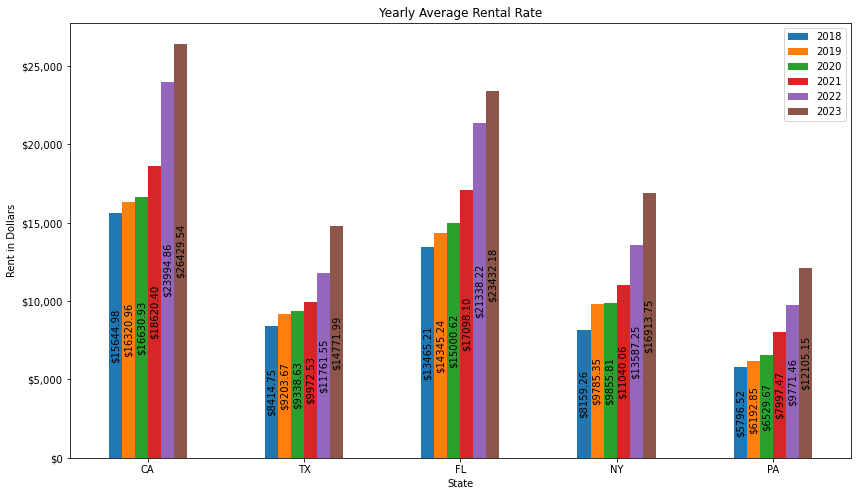

In [24]:
to_graph = yearly_state_avgs.T
year_graph = to_graph.plot.bar(figsize = (14,8), rot=0, title='Yearly Average Rental Rate',
                           ylabel='Rent in Dollars', xlabel='State')

# year_graph.bar_label(year_graph.containers[0], fmt='%d', label_type='edge', fontsize=10)

def label_formatter(x, pos):
    return "${:,.0f}".format(x)

# Apply the formatter to the y-axis ticks
year_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))

for container in year_graph.containers:
    year_graph.bar_label(container, fmt='$%.2f', label_type='center', fontsize=10, color='black',
                          rotation=90)

plt.savefig('output/Yearly_Average_Rentals', transparent=False, facecolor='white')

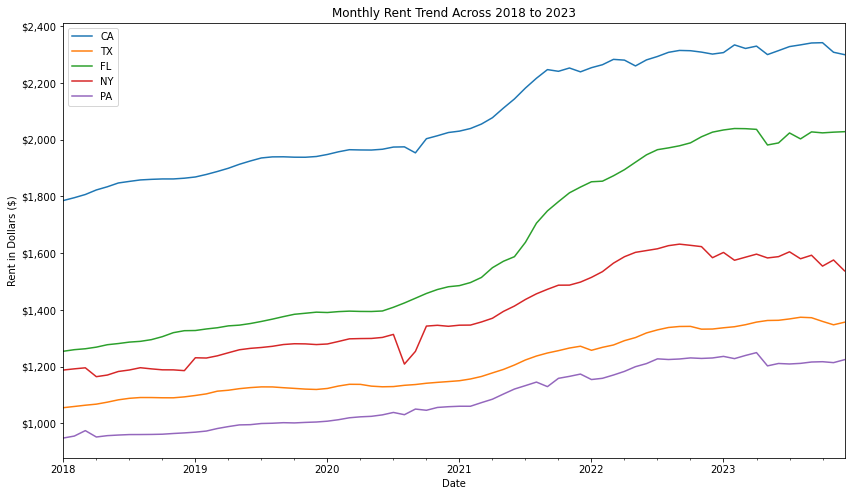

In [25]:
monthly_graph = monthly_df.plot.line(figsize = (14,8), title='Monthly Rent Trend Across 2018 to 2023', ylabel='Rent in Dollars ($)')

monthly_graph.yaxis.set_major_formatter(FuncFormatter(label_formatter))
plt.savefig('output/Monthly_Rental_Trend', transparent=False, facecolor='white')

In [26]:
ZORI_database = monthly_df
monthly_database = ZHVI_database.reset_index()
monthly_database.rename(columns={'index':'Date'})
monthly_database.drop(columns='index', inplace=True)
monthly_database

,Date,CA,TX,FL,NY,PA
0,2018-01-31,491858.110459,190853.792103,219544.257012,312968.619343,171604.239805
1,2018-02-28,497298.408138,191839.197281,220771.032095,314079.786906,172309.541572
2,2018-03-31,502257.614153,192993.433201,222005.073060,315527.420718,173286.086102
3,2018-04-30,506336.687832,194073.381008,223228.058910,317146.005162,174213.676170
4,2018-05-31,510068.671902,195199.660072,224496.444069,319500.961683,174950.437899
...,...,...,...,...,...,...
67,2023-08-31,722810.830530,295087.477528,385378.442796,443733.624198,251008.430940
68,2023-09-30,730268.503111,295124.789296,386536.027985,446344.733234,252308.868444
69,2023-10-31,736332.486797,294898.327140,387584.884146,448195.711473,253189.352626
70,2023-11-30,740671.921245,294417.715350,388504.505535,449741.470945,253718.399927


In [27]:
monthly_database.to_csv('output/ZORI_By_State.csv', index=False)

# For-Sale Listings

In [29]:
sales_df = pd.read_csv('data/Metro_mlp_uc_sfr_sm_month.csv')
sales_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,262433.0,270467.0,277133.0,280500.0,280800.0,...,374000.0,381667.0,389667.0,396167.0,399167.0,397833.0,396333.0,393300.0,389967.0,384633.0
1,394913,1,"New York, NY",msa,NY,492633.0,499333.0,507966.0,516633.0,522967.0,...,634633.0,644967.0,658300.0,666667.0,676600.0,676998.0,681938.0,684967.0,687902.0,687629.0
2,753899,2,"Los Angeles, CA",msa,CA,778333.0,791667.0,799667.0,806300.0,805967.0,...,929966.0,961633.0,981333.0,1014667.0,1058000.0,1085000.0,1100000.0,1075000.0,1065000.0,1033333.0
3,394463,3,"Chicago, IL",msa,IL,295800.0,309133.0,317600.0,321567.0,319933.0,...,309967.0,320000.0,329967.0,337967.0,344300.0,344333.0,342666.0,336333.0,332167.0,325833.0
4,394514,4,"Dallas, TX",msa,TX,325253.0,330319.0,333613.0,333632.0,330298.0,...,404630.0,416630.0,432667.0,444300.0,448967.0,446300.0,442833.0,437167.0,432167.0,427300.0


/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/3780768950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/3780768950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
/var/folders/0

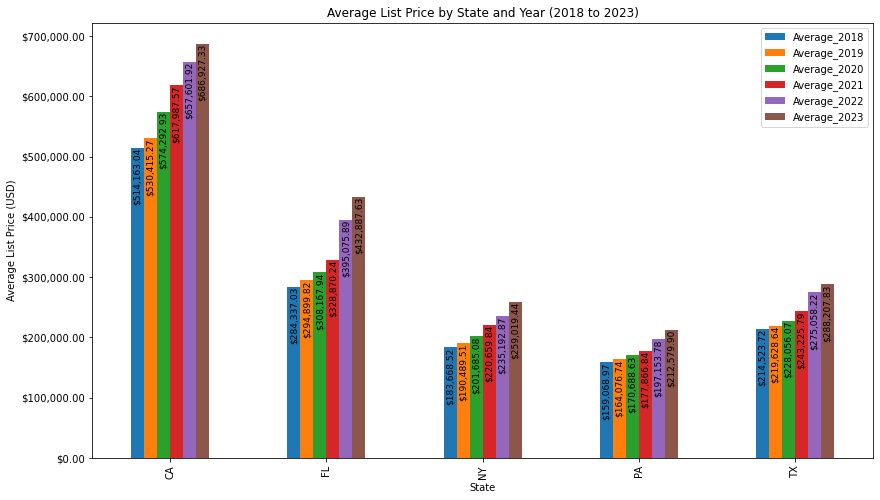

In [30]:
# Select and create the columns I want
selected_columns = ['StateName'] + [col for col in sales_df.columns if any(year in col for year in ['2018', '2019', '2020', '2021', '2022', '2023'])]
selected_data = sales_df[selected_columns]
# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]
# Create a new column for each year and calculate the average for each
for year in range(2018, 2024):
    selected_data_ny_tx[f'Average_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
# Group by state and select the average for each year
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Average_{year}' for year in range(2018, 2024)]].mean()
# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Average List Price (USD)')
ax.set_xlabel('State')
ax.set_title('Average List Price by State and Year (2018 to 2023)')
# Format y-axis labels to display in dollars
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',  # Adjust va to 'center' to place text inside the bar
                xytext=(0, 0),  # Adjust xytext for vertical position inside the bar
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')  # Rotate the text vertically

plt.savefig('visuals/Average List Price by State and Year.png')

plt.show()

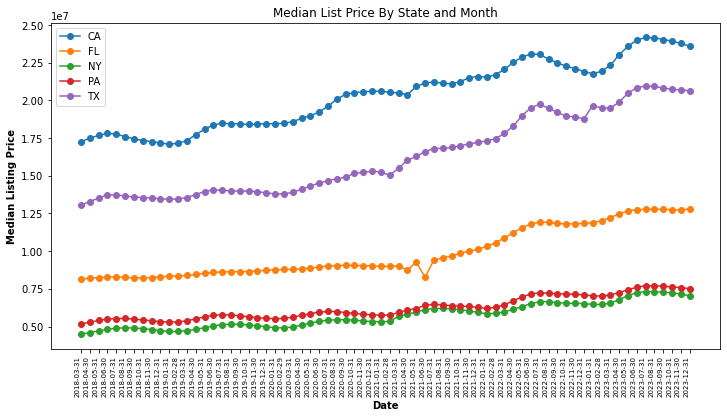

In [31]:
# List of states to filter
states_to_filter = ['CA', 'FL', 'NY', 'PA', 'TX']
# Find the index of the '3/31/2018' column
start_column_index = sales_df.columns.get_loc('2018-03-31')
# Prepare data for plotting
data = {'Date': []}
for state_to_filter in states_to_filter:
    data[state_to_filter] = []
for column_index in range(start_column_index, len(sales_df.columns)):
    column_name = sales_df.columns[column_index]
    data['Date'].append(column_name)
    for state_to_filter in states_to_filter:
        column_sum_for_state = sales_df.loc[sales_df['StateName'] == state_to_filter, column_name].sum()
        data[state_to_filter].append(column_sum_for_state)
# Convert data to DataFrame
line_df = pd.DataFrame(data)
# Plot the line chart
plt.figure(figsize=(12, 6))
for state_to_filter in states_to_filter:
    plt.plot(line_df['Date'], line_df[state_to_filter], label=state_to_filter, marker='o')
# Set labels and title
plt.xlabel('Date', fontweight='bold')  # Make 'Date' label bold
plt.ylabel('Median Listing Price', fontweight='bold')  # Make 'Total Listings' label bold
plt.title('Median List Price By State and Month')
plt.xticks(rotation=90, ha='right', fontsize=7)
# Show legend
plt.legend()
# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=7)
# Save the chart as an image (PNG format in this example)
plt.savefig('visuals/median_ list_price_by_state_and_month.png')
# Display the plot
plt.show()

In [32]:
#Read in csv regarding: New Construction Sales Count: The number of unique new construction homes that sold during the month. \
#Available for the raw cut of single family residence and condo.

construction_df = pd.read_csv('data/Metro_new_con_sales_count_raw_uc_sfrcondo_month.csv')
construction_df.head(15)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,102001,0,United States,country,NaN,37135.0,36493.0,46908.0,41663.0,44510.0,...,31489.0,43172.0,38025.0,43180.0,42573.0,34298.0,37424.0,34157.0,32067.0,30929.0
1,394913,1,"New York, NY",msa,NY,520.0,436.0,533.0,503.0,574.0,...,326.0,423.0,319.0,425.0,465.0,340.0,433.0,372.0,363.0,340.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,520.0,...,161.0,228.0,162.0,200.0,216.0,159.0,159.0,177.0,169.0,219.0
3,394463,3,"Chicago, IL",msa,IL,344.0,345.0,435.0,480.0,561.0,...,325.0,493.0,466.0,456.0,498.0,402.0,507.0,433.0,392.0,501.0
4,394514,4,"Dallas, TX",msa,TX,1502.0,1628.0,2183.0,1920.0,1757.0,...,1744.0,2220.0,1932.0,2056.0,1973.0,1568.0,1717.0,1510.0,1409.0,1341.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1796.0,...,1859.0,2329.0,1987.0,2208.0,2141.0,1705.0,1719.0,1707.0,1567.0,1802.0
6,395209,6,"Washington, DC",msa,VA,1205.0,1005.0,1334.0,968.0,1078.0,...,498.0,632.0,590.0,629.0,593.0,560.0,567.0,521.0,501.0,474.0
7,394974,7,"Philadelphia, PA",msa,PA,340.0,259.0,290.0,307.0,365.0,...,172.0,245.0,266.0,272.0,316.0,266.0,246.0,206.0,235.0,222.0
8,394856,8,"Miami, FL",msa,FL,550.0,513.0,856.0,751.0,795.0,...,170.0,272.0,244.0,244.0,273.0,240.0,242.0,244.0,238.0,251.0
9,394347,9,"Atlanta, GA",msa,GA,1715.0,2025.0,2472.0,2086.0,2026.0,...,1035.0,1438.0,1188.0,1380.0,1278.0,1035.0,1081.0,1040.0,993.0,946.0


/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/405730058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
/var/folders/0q/zkrflw495bzdzwtp6bs457gh0000gn/T/ipykernel_3532/405730058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)
/var/folde

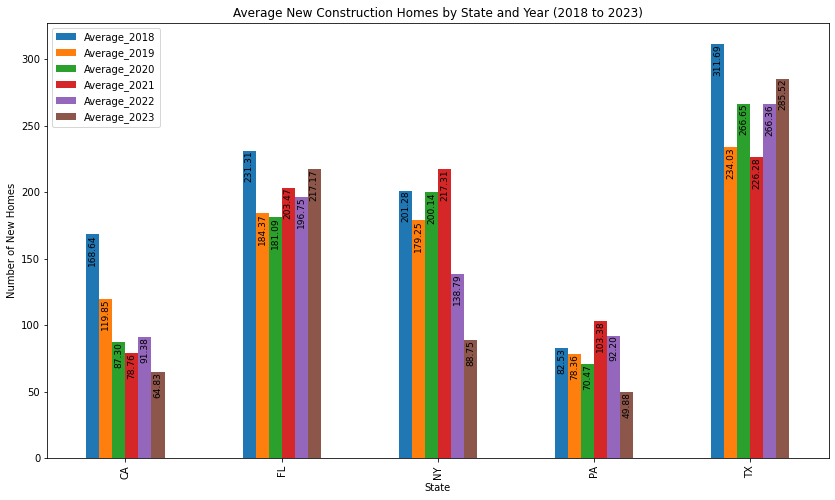

In [33]:
# Select and create the columns I want
selected_columns = ['StateName'] + [col for col in construction_df.columns if any(year in col for year in ['2018', '2019', '2020', '2021', '2022', '2023'])]
selected_data = construction_df[selected_columns]

# Filter the data for proper states
selected_data_states = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each year and calculate the average for each
for year in range(2018, 2024):
    selected_data_states[f'Average_{year}'] = selected_data_states.apply(lambda row: row.filter(like=str(year)).mean(), axis=1)

# Group by state and select the average for each year
grouped_df = selected_data_states.groupby('StateName')[[f'Average_{year}' for year in range(2018, 2024)]].mean()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Number of New Homes')
ax.set_xlabel('State')
ax.set_title('Average New Construction Homes by State and Year (2018 to 2023)')

# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',  # Adjust va to 'center' to place text inside the bar
                xytext=(0, 0),  # Adjust xytext for vertical position inside the bar
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')  # Rotate the text vertically

plt.savefig('visuals/Average New Construction Homes by State and Year.png')
plt.show()